In [1]:
import pytorch_lightning as pl
from models import *
from data.data_classes import *

In [2]:
save_filepath = "./plots/hand_plot1.pdf"

In [3]:
batch_size = 4
num_ctx_frames=5
num_tgt_frames=5
action_types = "flipped_jumpingjack"

weizmann = WeizmannDataModule(batch_size, 
                              num_ctx_frames, num_tgt_frames,
                              action_types=action_types)

weizmann.setup()

val_dl = weizmann.val_dataloader()
val_ctx_frames, val_tgt_frames = next(iter(val_dl))                                                      

### 3DConvNet

In [4]:
# # Experiment 3 (mse)
# model = ThreeDConv()
# model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment1/checkpoints/epoch=99-step=3400.ckpt")

# # Experiment 5 (l1)
# model = ThreeDConv()
# model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment2/checkpoints/epoch=99-step=3400.ckpt")

# # Experiment 4 (skip and autoregression; mse)
# model = ThreeDConvAutoreg()
# model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment3/checkpoints/epoch=99-step=3400.ckpt")

### SimVP

In [5]:
# # Experiment 1 (mse loss)
# hid_s=64
# hid_t=256
# N_s=4
# N_t=8
# kernel_sizes=[3,5,7,11]
# groups=4

# channels = 3
# height = 144
# width = 180
# input_shape = (channels, num_ctx_frames, height, width)

# model = SimVP(input_shape=input_shape, 
#                    hid_s=hid_s, hid_t=hid_t, 
#                    N_s=N_s, N_t=N_t,
#                    kernel_sizes=kernel_sizes, 
#                    groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment1/checkpoints/epoch=99-step=900.ckpt")

# # Experiment 2 (l1 loss)
# model = SimVP(input_shape=input_shape, 
#                    hid_s=hid_s, hid_t=hid_t, 
#                    N_s=N_s, N_t=N_t,
#                    kernel_sizes=kernel_sizes, 
#                    groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment2/checkpoints/epoch=99-step=900.ckpt")


### PredRNN

### Predicted Frames Set 1

In [6]:
model = ThreeDConv()
model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment1/checkpoints/epoch=99-step=3400.ckpt")

In [7]:
model.eval()
model1_pred_frames = model(val_ctx_frames)
model1_pred_frames.shape

torch.Size([4, 3, 5, 144, 180])

### Predicted Frames Set 2

In [8]:
model = ThreeDConv()
model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment2/checkpoints/epoch=99-step=3400.ckpt")

In [9]:
model.eval()
model2_pred_frames = model(val_ctx_frames)
model2_pred_frames.shape

torch.Size([4, 3, 5, 144, 180])

### Predicted Frames Set 3

In [10]:
model = ThreeDConvAutoreg()
model = model.load_from_checkpoint("./logs/ThreeDConv_new/experiment3/checkpoints/epoch=99-step=3400.ckpt")

In [11]:
model.eval()
model3_pred_frames = model(val_ctx_frames)
model3_pred_frames.shape

torch.Size([4, 3, 5, 144, 180])

### Plotting

In [12]:
def make_thesis_plot(frame_sets, names, plot_width, plot_height):

    def show_frames(frames, ax, row_label=None):
        start_id = 1 if row_label == "Context" else 6
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.15)

        if row_label is not None:
            ax[0].set_ylabel(row_label, wrap=True)

    fig, ax = plt.subplots(len(frame_sets), 5,
                               figsize = (plot_width, plot_height))

    for i, frames in enumerate(frame_sets):
        frames = frames.squeeze().permute(1, 2, 3, 0).cpu().detach().numpy()
        show_frames(frames, ax[i], names[i])
    fig.set_facecolor("white")
    plt.savefig(save_filepath)
    
    return fig

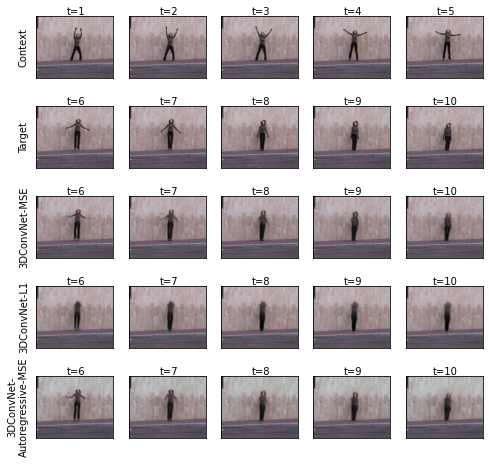

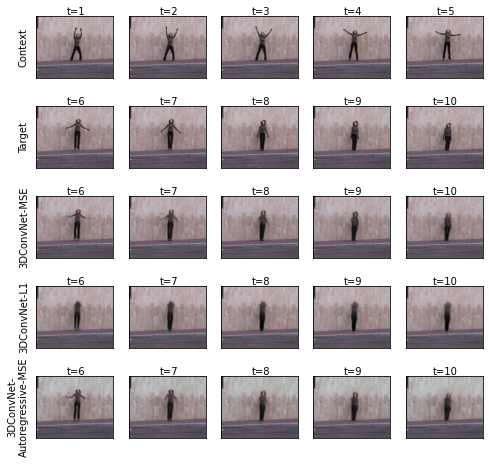

In [13]:
index = 0
plot_width = 8
plot_height = 8
frame_sets = [val_ctx_frames[index],
              val_tgt_frames[index],
              model1_pred_frames[index],
              model2_pred_frames[index],
              model3_pred_frames[index]]

names = ["Context", "Target", "3DConvNet-MSE", "3DConvNet-L1", "3DConvNet-\nAutoregressive-MSE"]               
make_thesis_plot(frame_sets, names, plot_width, plot_height)